In [106]:
import IPython
import pandas as pd
import matplotlib as ml
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
from datetime import datetime

from IPython.display import Markdown as md
from IPython.display import Math as m

# Vital Signs Table

In [107]:
timeStampStr = datetime.today().strftime("%y-%m-%d_%H-%M-%S.%f")

# Content

## Automatic Chi2 Test

In [108]:
from scipy.stats import chi2_contingency
import IPython.display as display
from IPython.display import Markdown as md

def printmd(string):
    IPython.display.display(IPython.display.Markdown(string))

def printChi2Test(df,colName1,colName2,correction=True):
    dfCT = pd.crosstab(df[colName1],df[colName2])
    stat, p, dof, expected = chi2_contingency(dfCT,correction=correction)
    print(f"stat = {stat}")
    print(f"p = {p}")
    print(f"dof = {dof}")
    print(f"expected = {expected}")
    printmd(f"Since p={p:.1g}<0.05, based on Chi2 test we can reject hypothesis that death as outcome does not depend "
       f"on the presence of a renal disease.")

In [109]:
def printChi2(df,text="Empty",correction=True):
    printmd(f"# {text}")
    stat, p, dof, expected = chi2_contingency(df,correction=correction)
    print(f"stat = {stat}")
    print(f"p = {p}")
    print(f"dof = {dof}")
    print(f"expected = {expected}")
    printmd(f"Since p={p:.1g}<0.05, based on  test we can reject hypothesis that death as outcome does not depend "
   f"on the presence of a renal disease.")

In [110]:
from itertools import combinations
from statsmodels.sandbox.stats.multicomp import multipletests
def get_asterisks_for_pval(p_val):
    """Receives the p-value and returns asterisks string."""
    if p_val > 0.05:
        p_text = "ns"  # above threshold => not significant
    elif p_val < 1e-4:
        p_text = '****'
    elif p_val < 1e-3:
        p_text = '***'
    elif p_val < 1e-2:
        p_text = '**'
    else:
        p_text = '*'

    return p_text

def chisq_and_posthoc_corrected(df):
    """Receives a dataframe and performs chi2 test and then post hoc.
    Prints the p-values and corrected p-values (after FDR correction)"""
    # start by running chi2 test on the matrix
    chi2, p, dof, ex = chi2_contingency(df, correction=True)
    print(f"Chi2 result of the contingency table: {chi2}, p-value: {p}")

    # post-hoc
    all_combinations = list(combinations(df.index, 2))  # gathering all combinations for post-hoc chi2
    p_vals = []
    print("Significance results:")
    for comb in all_combinations:
        new_df = df[(df.index == comb[0]) | (df.index == comb[1])]
        chi2, p, dof, ex = chi2_contingency(new_df, correction=True)
        p_vals.append(p)
        # print(f"For {comb}: {p}")  # uncorrected

    # checking significance
    # correction for multiple testing
    reject_list, corrected_p_vals = multipletests(p_vals, method='fdr_bh')[:2]
    for p_val, corr_p_val, reject, comb in zip(p_vals, corrected_p_vals, reject_list, all_combinations):
        print(f"{comb}: p_value: {p_val:5f}; corrected: {corr_p_val:5f} ({get_asterisks_for_pval(p_val)}) reject: {reject}")

In [111]:
%matplotlib inline

# Questions
- Are there differences in outcomes between people who present early (e.g. within 7 days of symptom onset) vs late?

# Data Reading
# Melted

In [112]:
fpMelted="C:\Work\dev\dECMT_src\data_all\COVID19_Data\Preprocessed_Data\df_melted_29092020_ow.csv"
fpMelted="C:\Work\dev\dECMT_src\data_all\COVID19_Data\Preprocessed_Data\df_melted_02102020_ow.csv"
dfMelted = pd.read_csv(fpMelted)

In [113]:
# Index(['Unnamed: 0', 'STUDY_ID', 'ADMISSION_START_DATE', 'ADMISSION_END_DATE',
#        'ITU_START_DATE', 'ITU_END_DATE', 'INVASIVE_VENTILATION_START_DATE',
#        'INVASIVE_VENTILATION_END_DATE', 'NIV_START_DATE', 'NIV_END_DATE',
#        'C5_START_DATE', 'C5_END_DATE', 'ADMISSION_START_DAY',
#        'ADMISSION_END_DAY', 'ITU_START_DAY', 'ITU_END_DAY',
#        'INVASIVE_VENTILATION_START_DAY', 'INVASIVE_VENTILATION_END_DAY',
#        'NIV_START_DAY', 'NIV_END_DAY', 'C5_START_DAY', 'C5_END_DAY',
#        'PATIENT_AGE', 'GENDER', 'DEATH_DATE', 'DISCHARGE_DATE', 'DEATH_DAY',
#        'DISCHARGE_DAY', 'ITU', 'INV', 'NIV', 'C5', 'DEATH', 'DISCHARGED',
#        'SURVIVED', 'STILL_IN', 'READMITTED', 'ADMISSION_NB', 'AGE_GROUP',
#        'AGE_GROUP_2', 'COPD', 'ASTHMA', 'ILD', 'BRONCHIECTASIS',
#        'HYPERTENSION', 'THROMBOEMBOLIC', 'CARDIAC_D', 'RENAL_D', 'LIVER_D',
#        'NEURAL_D', 'META_SOLID_TUMOUR', 'MAGLINANT_NEO', 'DIABETES', 'OBESITY',
#        'HIV', 'RHEUMATO_D', 'DIMENTIA', 'IMMUNO', 'NB_COMOR',
#        'SYMPTOM_ONSET_DATE', 'ADMISSION_DAY_SINCE_ONSET', 'SPECIMEN_DATE',
#        'SPECIMEN_DAY_SINCE_ADMISSION', 'SPECIMENT_DAY_SINCE_ONSET',
#        'PARAMETER', 'meanValue'],
#       dtype='object')

In [114]:
dfMelted.columns

Index(['Unnamed: 0', 'STUDY_ID', 'ADMISSION_START_DATE', 'ADMISSION_END_DATE',
       'ITU_START_DATE', 'ITU_END_DATE', 'INVASIVE_VENTILATION_START_DATE',
       'INVASIVE_VENTILATION_END_DATE', 'NIV_START_DATE', 'NIV_END_DATE',
       'C5_START_DATE', 'C5_END_DATE', 'ADMISSION_START_DAY',
       'ADMISSION_END_DAY', 'ITU_START_DAY', 'ITU_END_DAY',
       'INVASIVE_VENTILATION_START_DAY', 'INVASIVE_VENTILATION_END_DAY',
       'NIV_START_DAY', 'NIV_END_DAY', 'C5_START_DAY', 'C5_END_DAY',
       'PATIENT_AGE', 'GENDER', 'DEATH_DATE', 'DISCHARGE_DATE', 'DEATH_DAY',
       'DISCHARGE_DAY', 'ITU', 'INV', 'NIV', 'C5', 'DEATH', 'DISCHARGED',
       'SURVIVED', 'STILL_IN', 'READMITTED', 'ADMISSION_NB', 'AGE_GROUP',
       'AGE_GROUP_2', 'COPD', 'ASTHMA', 'ILD', 'BRONCHIECTASIS',
       'HYPERTENSION', 'THROMBOEMBOLIC', 'CARDIAC_D', 'RENAL_D', 'LIVER_D',
       'NEURAL_D', 'META_SOLID_TUMOUR', 'MAGLINANT_NEO', 'DIABETES', 'OBESITY',
       'HIV', 'RHEUMATO_D', 'DIMENTIA', 'IMMUNO', 'NB_COMOR',

In [115]:
dfMelted[['SPECIMEN_DATE','SPECIMEN_DAY_SINCE_ADMISSION', 'SPECIMENT_DAY_SINCE_ONSET']].head()

,SPECIMEN_DATE,SPECIMEN_DAY_SINCE_ADMISSION,SPECIMENT_DAY_SINCE_ONSET
0,2020-03-26,0.0,5.0
1,2020-03-27,1.0,6.0
2,2020-03-28,2.0,7.0
3,2020-03-29,3.0,8.0
4,2020-03-30,4.0,9.0


## Etnicity

In [116]:
fpEthinc = "C:\Work\dev\dECMT_src\data_all\COVID19_Data\Current\REACT_Demographics.csv"
# ethnicity
dfEthnic = pd.read_csv(fpEthinc)
dfEthnic.head()
dfEthnic.columns

Index(['STUDY_ID', 'PATIENT_AGE', 'DOB', 'DATE_OF_DEATH', 'DOD_DATE', 'GENDER',
       'ETHNIC_GROUP', 'SMOKING_HISTORY', 'POSTCODE', 'IS_PREGNANT', 'HEIG',
       'WEIG', 'BMI', 'FIRST_POS_DATE', 'FIRST_POS_DATE_R', 'FIRST_POS_TIME_R',
       'ADMIT_DATETIME', 'ADM_DATE_R', 'ADM_TIME_R', 'DISCHARGEDATE',
       'DISCHARGE_DATE_R', 'DISCHARGE_TIME_R', 'LOS', 'LOS_PREPOS', 'READM28',
       'READM_DATETIME', 'READM_DATE', 'READM_TIME'],
      dtype='object')

In [117]:
dfEthnicOnly = dfEthnic[['STUDY_ID','ETHNIC_GROUP']]

In [118]:
len(dfMelted)

264826

In [119]:
dfMelted = pd.merge(dfMelted,dfEthnicOnly,on='STUDY_ID',how='left')
len(dfMelted)

264826

In [120]:
dfMelted['ETHNIC_GROUP'].value_counts()

A    194616
L     14416
Z      7922
C      7140
N      6970
X      5474
S      4522
G      3740
E      3536
H      2652
P      1768
J      1394
D       816
R       340
M       238
B       204
K       204
Name: ETHNIC_GROUP, dtype: int64

In [121]:
dfEthnic.columns

Index(['STUDY_ID', 'PATIENT_AGE', 'DOB', 'DATE_OF_DEATH', 'DOD_DATE', 'GENDER',
       'ETHNIC_GROUP', 'SMOKING_HISTORY', 'POSTCODE', 'IS_PREGNANT', 'HEIG',
       'WEIG', 'BMI', 'FIRST_POS_DATE', 'FIRST_POS_DATE_R', 'FIRST_POS_TIME_R',
       'ADMIT_DATETIME', 'ADM_DATE_R', 'ADM_TIME_R', 'DISCHARGEDATE',
       'DISCHARGE_DATE_R', 'DISCHARGE_TIME_R', 'LOS', 'LOS_PREPOS', 'READM28',
       'READM_DATETIME', 'READM_DATE', 'READM_TIME'],
      dtype='object')

In [122]:
# dfMelted = dfMelted['ETHNIC_GROUP']

In [123]:
dfMelted.head()

,Unnamed: 0,STUDY_ID,ADMISSION_START_DATE,ADMISSION_END_DATE,ITU_START_DATE,ITU_END_DATE,INVASIVE_VENTILATION_START_DATE,INVASIVE_VENTILATION_END_DATE,NIV_START_DATE,NIV_END_DATE,...,IMMUNO,NB_COMOR,SYMPTOM_ONSET_DATE,ADMISSION_DAY_SINCE_ONSET,SPECIMEN_DATE,SPECIMEN_DAY_SINCE_ADMISSION,SPECIMENT_DAY_SINCE_ONSET,PARAMETER,meanValue,ETHNIC_GROUP
0,0,UHSCOVID_00989a42,2020-03-26,2020-04-02,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,4.0,2020-03-21,5.0,2020-03-26,0.0,5.0,ALT,NaN,A
1,1,UHSCOVID_00989a42,2020-03-26,2020-04-02,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,4.0,2020-03-21,5.0,2020-03-27,1.0,6.0,ALT,NaN,A
2,2,UHSCOVID_00989a42,2020-03-26,2020-04-02,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,4.0,2020-03-21,5.0,2020-03-28,2.0,7.0,ALT,NaN,A
3,3,UHSCOVID_00989a42,2020-03-26,2020-04-02,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,4.0,2020-03-21,5.0,2020-03-29,3.0,8.0,ALT,23.0,A
4,4,UHSCOVID_00989a42,2020-03-26,2020-04-02,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,4.0,2020-03-21,5.0,2020-03-30,4.0,9.0,ALT,NaN,A


In [124]:
dfMelted['READMITTED'].value_counts()

0.0    257618
1.0      7208
Name: READMITTED, dtype: int64

In [125]:
dfMelted['STUDY_ID'].value_counts()

UHSCOVID_1277db7c    4590
UHSCOVID_a567e383    4488
UHSCOVID_beb0ab71    3706
UHSCOVID_6d0785dc    2686
UHSCOVID_b8332747    2618
                     ... 
UHSCOVID_9d78e309      34
UHSCOVID_9980073f      34
UHSCOVID_3ba67132      34
UHSCOVID_e289bcb7      34
UHSCOVID_bd7219d6      34
Name: STUDY_ID, Length: 651, dtype: int64

In [126]:
len(dfMelted['STUDY_ID'].unique())

651

In [127]:
x=dfMelted['ADMISSION_DAY_SINCE_ONSET'].unique()

In [128]:
y=dfMelted['ADMISSION_DAY_SINCE_ONSET'].value_counts()
y

 0.0     23732
 4.0     21760
 7.0     21148
 14.0    14620
 1.0     10778
         ...  
-22.0      306
-31.0      306
 25.0      272
-26.0      238
 22.0      136
Name: ADMISSION_DAY_SINCE_ONSET, Length: 62, dtype: int64

In [129]:
dfMelted.columns

Index(['Unnamed: 0', 'STUDY_ID', 'ADMISSION_START_DATE', 'ADMISSION_END_DATE',
       'ITU_START_DATE', 'ITU_END_DATE', 'INVASIVE_VENTILATION_START_DATE',
       'INVASIVE_VENTILATION_END_DATE', 'NIV_START_DATE', 'NIV_END_DATE',
       'C5_START_DATE', 'C5_END_DATE', 'ADMISSION_START_DAY',
       'ADMISSION_END_DAY', 'ITU_START_DAY', 'ITU_END_DAY',
       'INVASIVE_VENTILATION_START_DAY', 'INVASIVE_VENTILATION_END_DAY',
       'NIV_START_DAY', 'NIV_END_DAY', 'C5_START_DAY', 'C5_END_DAY',
       'PATIENT_AGE', 'GENDER', 'DEATH_DATE', 'DISCHARGE_DATE', 'DEATH_DAY',
       'DISCHARGE_DAY', 'ITU', 'INV', 'NIV', 'C5', 'DEATH', 'DISCHARGED',
       'SURVIVED', 'STILL_IN', 'READMITTED', 'ADMISSION_NB', 'AGE_GROUP',
       'AGE_GROUP_2', 'COPD', 'ASTHMA', 'ILD', 'BRONCHIECTASIS',
       'HYPERTENSION', 'THROMBOEMBOLIC', 'CARDIAC_D', 'RENAL_D', 'LIVER_D',
       'NEURAL_D', 'META_SOLID_TUMOUR', 'MAGLINANT_NEO', 'DIABETES', 'OBESITY',
       'HIV', 'RHEUMATO_D', 'DIMENTIA', 'IMMUNO', 'NB_COMOR',

In [130]:
dfMelted['STUDY_ID'].unique().shape

(651,)

In [131]:
dfMelted.shape

(264826, 67)

In [132]:
# type(x)
# plt.plot.hist(x)

In [133]:
dfMelted.columns

Index(['Unnamed: 0', 'STUDY_ID', 'ADMISSION_START_DATE', 'ADMISSION_END_DATE',
       'ITU_START_DATE', 'ITU_END_DATE', 'INVASIVE_VENTILATION_START_DATE',
       'INVASIVE_VENTILATION_END_DATE', 'NIV_START_DATE', 'NIV_END_DATE',
       'C5_START_DATE', 'C5_END_DATE', 'ADMISSION_START_DAY',
       'ADMISSION_END_DAY', 'ITU_START_DAY', 'ITU_END_DAY',
       'INVASIVE_VENTILATION_START_DAY', 'INVASIVE_VENTILATION_END_DAY',
       'NIV_START_DAY', 'NIV_END_DAY', 'C5_START_DAY', 'C5_END_DAY',
       'PATIENT_AGE', 'GENDER', 'DEATH_DATE', 'DISCHARGE_DATE', 'DEATH_DAY',
       'DISCHARGE_DAY', 'ITU', 'INV', 'NIV', 'C5', 'DEATH', 'DISCHARGED',
       'SURVIVED', 'STILL_IN', 'READMITTED', 'ADMISSION_NB', 'AGE_GROUP',
       'AGE_GROUP_2', 'COPD', 'ASTHMA', 'ILD', 'BRONCHIECTASIS',
       'HYPERTENSION', 'THROMBOEMBOLIC', 'CARDIAC_D', 'RENAL_D', 'LIVER_D',
       'NEURAL_D', 'META_SOLID_TUMOUR', 'MAGLINANT_NEO', 'DIABETES', 'OBESITY',
       'HIV', 'RHEUMATO_D', 'DIMENTIA', 'IMMUNO', 'NB_COMOR',

In [134]:
dfMelted.shape

(264826, 67)

In [135]:
dfMelted['ITU'].value_counts()

0.0    177990
1.0     86836
Name: ITU, dtype: int64

In [136]:
selectedColsUnique = ['STUDY_ID','ADMISSION_START_DATE','ADMISSION_DAY_SINCE_ONSET', 'SYMPTOM_ONSET_DATE', 'ADMISSION_END_DATE','DEATH_DATE',
'DISCHARGE_DATE', 'DEATH', 'DISCHARGED','SURVIVED','READMITTED']

selectedCols = ['STUDY_ID','ADMISSION_START_DATE','ADMISSION_DAY_SINCE_ONSET',  'SYMPTOM_ONSET_DATE', 'ADMISSION_END_DATE','DEATH_DATE',
'DISCHARGE_DATE', 'DEATH', 'DISCHARGED','SURVIVED','ITU','NIV','READMITTED','PATIENT_AGE', 'GENDER','ASTHMA', 'COPD','BRONCHIECTASIS',
       'HYPERTENSION', 'THROMBOEMBOLIC', 'CARDIAC_D', 'RENAL_D', 'LIVER_D',
       'NEURAL_D', 'META_SOLID_TUMOUR', 'MAGLINANT_NEO', 'DIABETES', 'OBESITY',
       'HIV', 'RHEUMATO_D', 'DIMENTIA', 'IMMUNO', 'NB_COMOR','ETHNIC_GROUP','SPECIMEN_DATE', 'SPECIMEN_DAY_SINCE_ADMISSION', 'SPECIMENT_DAY_SINCE_ONSET',
       'PARAMETER', 'meanValue']

In [137]:
dfMeltedUnique = dfMelted.drop_duplicates(selectedColsUnique)[selectedCols]
dfMeltedUnique.head()

,STUDY_ID,ADMISSION_START_DATE,ADMISSION_DAY_SINCE_ONSET,SYMPTOM_ONSET_DATE,ADMISSION_END_DATE,DEATH_DATE,DISCHARGE_DATE,DEATH,DISCHARGED,SURVIVED,...,RHEUMATO_D,DIMENTIA,IMMUNO,NB_COMOR,ETHNIC_GROUP,SPECIMEN_DATE,SPECIMEN_DAY_SINCE_ADMISSION,SPECIMENT_DAY_SINCE_ONSET,PARAMETER,meanValue
0,UHSCOVID_00989a42,2020-03-26,5.0,2020-03-21,2020-04-02,NaN,2020-04-02,0.0,1.0,1.0,...,0.0,0.0,0.0,4.0,A,2020-03-26,0.0,5.0,ALT,NaN
8,UHSCOVID_00ac1e32,2020-04-07,-4.0,2020-04-11,2020-05-19,NaN,2020-05-19,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,A,2020-04-07,0.0,-4.0,ALT,NaN
51,UHSCOVID_00cb7bdd,2020-04-10,5.0,2020-04-05,2020-04-13,2020-04-13,2020-04-13,1.0,1.0,0.0,...,0.0,0.0,0.0,5.0,A,2020-04-10,0.0,5.0,ALT,25.0
54,UHSCOVID_01add35c,2020-05-22,0.0,2020-05-22,2020-05-23,2020-05-27,2020-05-23,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,A,2020-05-22,0.0,0.0,ALT,8.0
57,UHSCOVID_01f7838d,2020-05-04,-7.0,2020-05-11,2020-05-17,NaN,2020-05-17,0.0,1.0,1.0,...,0.0,0.0,0.0,5.0,A,2020-05-04,0.0,-7.0,ALT,9.0


In [138]:
dfMeltedUnique['NIV'].value_counts()

0.0    545
1.0    106
Name: NIV, dtype: int64

In [139]:
dfMeltedUnique['Death_Discharged_Survived_Str'] = pd.NA
dfMeltedUnique['Death_Discharged_Survived'] = pd.NA
map1= (dfMeltedUnique['DEATH']==0) & (dfMeltedUnique['DISCHARGED']==1) & (dfMeltedUnique['SURVIVED']==1)
dfMeltedUnique.loc[map1,'Death_Discharged_Survived']=0
dfMeltedUnique.loc[map1,'Death_Discharged_Survived_Str'] = 'Survived'

In [140]:
map2= (dfMeltedUnique['DEATH']==1) & (dfMeltedUnique['DISCHARGED']==0) & (dfMeltedUnique['SURVIVED']==0)
dfMeltedUnique.loc[map2,'Death_Discharged_Survived']=1
dfMeltedUnique.loc[map2,'Death_Discharged_Survived_Str'] = 'Died in Hospital'

In [141]:
dfMeltedUnique['Death_Discharged_Survived'].value_counts()

0    428
1      1
Name: Death_Discharged_Survived, dtype: int64

In [142]:
dfMeltedUnique.columns

Index(['STUDY_ID', 'ADMISSION_START_DATE', 'ADMISSION_DAY_SINCE_ONSET',
       'SYMPTOM_ONSET_DATE', 'ADMISSION_END_DATE', 'DEATH_DATE',
       'DISCHARGE_DATE', 'DEATH', 'DISCHARGED', 'SURVIVED', 'ITU', 'NIV',
       'READMITTED', 'PATIENT_AGE', 'GENDER', 'ASTHMA', 'COPD',
       'BRONCHIECTASIS', 'HYPERTENSION', 'THROMBOEMBOLIC', 'CARDIAC_D',
       'RENAL_D', 'LIVER_D', 'NEURAL_D', 'META_SOLID_TUMOUR', 'MAGLINANT_NEO',
       'DIABETES', 'OBESITY', 'HIV', 'RHEUMATO_D', 'DIMENTIA', 'IMMUNO',
       'NB_COMOR', 'ETHNIC_GROUP', 'SPECIMEN_DATE',
       'SPECIMEN_DAY_SINCE_ADMISSION', 'SPECIMENT_DAY_SINCE_ONSET',
       'PARAMETER', 'meanValue', 'Death_Discharged_Survived_Str',
       'Death_Discharged_Survived'],
      dtype='object')

In [143]:
map2.sum()

1

In [144]:
dfMeltedUnique['Discharged_Readmitted_Died']="Missing" #"Unknown"
dfMeltedUnique.loc[(dfMeltedUnique['DISCHARGED']==1),'Discharged_Readmitted_Died']= "Discharged"
dfMeltedUnique.loc[(dfMeltedUnique['READMITTED']==1),'Discharged_Readmitted_Died']= "Readmitted"
dfMeltedUnique.loc[(dfMeltedUnique['DEATH']==1),'Discharged_Readmitted_Died']= "Died"

In [145]:
dfMeltedUnique['Discharged_Readmitted_Died'].value_counts()

Discharged    419
Died          216
Readmitted      9
Missing         7
Name: Discharged_Readmitted_Died, dtype: int64

In [146]:
dfMeltedUnique['Discharged_Readmitted_Died'].unique()

array(['Discharged', 'Died', 'Readmitted', 'Missing'], dtype=object)

In [147]:
# Died in Hospital, Died at Home, Survived

In [148]:
dfMeltedUnique['Died_in_Hosp_or_Discharged_or_Survived_Str']=pd.NA

In [149]:
# Died in Hospital, Died at Home, Survived

In [150]:
dfMeltedUnique['Died_or_Survived_Str']=pd.NA

In [151]:
dfMeltedUnique['Died_or_Survived'] = dfMeltedUnique['DEATH']

In [152]:
mapDied= dfMeltedUnique['DEATH']==1
dfMeltedUnique.loc[mapDied,'Died_or_Survived_Str']='Died'

In [153]:
mapSurvived = dfMeltedUnique['DEATH']==0
dfMeltedUnique.loc[mapSurvived,'Died_or_Survived_Str']='Survived'

In [154]:
cc = dfMeltedUnique['Died_or_Survived'].value_counts()
cc

0.0    435
1.0    216
Name: Died_or_Survived, dtype: int64

In [155]:
type(cc)

pandas.core.series.Series

In [156]:
dfMeltedUnique.head()

,STUDY_ID,ADMISSION_START_DATE,ADMISSION_DAY_SINCE_ONSET,SYMPTOM_ONSET_DATE,ADMISSION_END_DATE,DEATH_DATE,DISCHARGE_DATE,DEATH,DISCHARGED,SURVIVED,...,SPECIMEN_DAY_SINCE_ADMISSION,SPECIMENT_DAY_SINCE_ONSET,PARAMETER,meanValue,Death_Discharged_Survived_Str,Death_Discharged_Survived,Discharged_Readmitted_Died,Died_in_Hosp_or_Discharged_or_Survived_Str,Died_or_Survived_Str,Died_or_Survived
0,UHSCOVID_00989a42,2020-03-26,5.0,2020-03-21,2020-04-02,NaN,2020-04-02,0.0,1.0,1.0,...,0.0,5.0,ALT,NaN,Survived,0,Discharged,<NA>,Survived,0.0
8,UHSCOVID_00ac1e32,2020-04-07,-4.0,2020-04-11,2020-05-19,NaN,2020-05-19,0.0,1.0,1.0,...,0.0,-4.0,ALT,NaN,Survived,0,Discharged,<NA>,Survived,0.0
51,UHSCOVID_00cb7bdd,2020-04-10,5.0,2020-04-05,2020-04-13,2020-04-13,2020-04-13,1.0,1.0,0.0,...,0.0,5.0,ALT,25.0,<NA>,<NA>,Died,<NA>,Died,1.0
54,UHSCOVID_01add35c,2020-05-22,0.0,2020-05-22,2020-05-23,2020-05-27,2020-05-23,1.0,1.0,0.0,...,0.0,0.0,ALT,8.0,<NA>,<NA>,Died,<NA>,Died,1.0
57,UHSCOVID_01f7838d,2020-05-04,-7.0,2020-05-11,2020-05-17,NaN,2020-05-17,0.0,1.0,1.0,...,0.0,-7.0,ALT,9.0,Survived,0,Discharged,<NA>,Survived,0.0


In [157]:
dfMeltedUnique.columns

Index(['STUDY_ID', 'ADMISSION_START_DATE', 'ADMISSION_DAY_SINCE_ONSET',
       'SYMPTOM_ONSET_DATE', 'ADMISSION_END_DATE', 'DEATH_DATE',
       'DISCHARGE_DATE', 'DEATH', 'DISCHARGED', 'SURVIVED', 'ITU', 'NIV',
       'READMITTED', 'PATIENT_AGE', 'GENDER', 'ASTHMA', 'COPD',
       'BRONCHIECTASIS', 'HYPERTENSION', 'THROMBOEMBOLIC', 'CARDIAC_D',
       'RENAL_D', 'LIVER_D', 'NEURAL_D', 'META_SOLID_TUMOUR', 'MAGLINANT_NEO',
       'DIABETES', 'OBESITY', 'HIV', 'RHEUMATO_D', 'DIMENTIA', 'IMMUNO',
       'NB_COMOR', 'ETHNIC_GROUP', 'SPECIMEN_DATE',
       'SPECIMEN_DAY_SINCE_ADMISSION', 'SPECIMENT_DAY_SINCE_ONSET',
       'PARAMETER', 'meanValue', 'Death_Discharged_Survived_Str',
       'Death_Discharged_Survived', 'Discharged_Readmitted_Died',
       'Died_in_Hosp_or_Discharged_or_Survived_Str', 'Died_or_Survived_Str',
       'Died_or_Survived'],
      dtype='object')

In [158]:
dfMeltedUnique['PATIENT_AGE']

0       64.0
8       73.0
51      76.0
54      67.0
57      97.0
        ... 
7754    47.0
7759    70.0
7764    67.0
7778    88.0
7787    57.0
Name: PATIENT_AGE, Length: 651, dtype: float64

In [159]:
# dictPresenterType3C = {'(-7,0] Early':0,'>7days Late':1,'<0 days (Hospital)':2}
dictPresenterType3C = {'Early Presenters':0,'Late Presenters':1,'Hospital Equired':2}
dictPresenterType3CReversed = {v:k for k,v in dictPresenterType3C.items()}
dictPresenterType3CReversed

{0: 'Early Presenters', 1: 'Late Presenters', 2: 'Hospital Equired'}

In [160]:
dfMeltedUnique['Onset Time']=pd.NA
dfMeltedUnique['Symptoms onset']='Unknown'

In [161]:
mp1= (dfMeltedUnique['ADMISSION_DAY_SINCE_ONSET']<=7) & (dfMeltedUnique['ADMISSION_DAY_SINCE_ONSET']>=0)
epS = 'Early Presenters'
epVal = dictPresenterType3C.get(epS)
dfMeltedUnique.loc[mp1,'Onset Time'] = epVal
dfMeltedUnique.loc[mp1,'Symptoms onset']= dictPresenterType3CReversed[epVal]

In [162]:
#{'Early Presenters':0,'Late Presenters':1,'Hospital Equired':2}

In [163]:
mp2= (dfMeltedUnique['ADMISSION_DAY_SINCE_ONSET']>7)
epS = 'Late Presenters'
epVal = dictPresenterType3C.get(epS)
dfMeltedUnique.loc[mp2,'Onset Time'] = epVal
dfMeltedUnique.loc[mp2,'Symptoms onset']= dictPresenterType3CReversed[epVal]

In [164]:
mp3= dfMeltedUnique['ADMISSION_DAY_SINCE_ONSET']<0
epS = 'Hospital Equired'
epVal = dictPresenterType3C.get(epS)
dfMeltedUnique.loc[mp3,'Onset Time'] = epVal
dfMeltedUnique.loc[mp3,'Symptoms onset']= dictPresenterType3CReversed[epVal]

In [165]:
dfMeltedUnique['Symptoms onset'].value_counts()

Early Presenters    349
Hospital Equired    123
Late Presenters     111
Unknown              68
Name: Symptoms onset, dtype: int64

In [166]:
dfMeltedUnique.shape

(651, 47)

In [167]:
dfMeltedUnique.head()

,STUDY_ID,ADMISSION_START_DATE,ADMISSION_DAY_SINCE_ONSET,SYMPTOM_ONSET_DATE,ADMISSION_END_DATE,DEATH_DATE,DISCHARGE_DATE,DEATH,DISCHARGED,SURVIVED,...,PARAMETER,meanValue,Death_Discharged_Survived_Str,Death_Discharged_Survived,Discharged_Readmitted_Died,Died_in_Hosp_or_Discharged_or_Survived_Str,Died_or_Survived_Str,Died_or_Survived,Onset Time,Symptoms onset
0,UHSCOVID_00989a42,2020-03-26,5.0,2020-03-21,2020-04-02,NaN,2020-04-02,0.0,1.0,1.0,...,ALT,NaN,Survived,0,Discharged,<NA>,Survived,0.0,0,Early Presenters
8,UHSCOVID_00ac1e32,2020-04-07,-4.0,2020-04-11,2020-05-19,NaN,2020-05-19,0.0,1.0,1.0,...,ALT,NaN,Survived,0,Discharged,<NA>,Survived,0.0,2,Hospital Equired
51,UHSCOVID_00cb7bdd,2020-04-10,5.0,2020-04-05,2020-04-13,2020-04-13,2020-04-13,1.0,1.0,0.0,...,ALT,25.0,<NA>,<NA>,Died,<NA>,Died,1.0,0,Early Presenters
54,UHSCOVID_01add35c,2020-05-22,0.0,2020-05-22,2020-05-23,2020-05-27,2020-05-23,1.0,1.0,0.0,...,ALT,8.0,<NA>,<NA>,Died,<NA>,Died,1.0,0,Early Presenters
57,UHSCOVID_01f7838d,2020-05-04,-7.0,2020-05-11,2020-05-17,NaN,2020-05-17,0.0,1.0,1.0,...,ALT,9.0,Survived,0,Discharged,<NA>,Survived,0.0,2,Hospital Equired


In [168]:
dfMeltedUnique.columns

Index(['STUDY_ID', 'ADMISSION_START_DATE', 'ADMISSION_DAY_SINCE_ONSET',
       'SYMPTOM_ONSET_DATE', 'ADMISSION_END_DATE', 'DEATH_DATE',
       'DISCHARGE_DATE', 'DEATH', 'DISCHARGED', 'SURVIVED', 'ITU', 'NIV',
       'READMITTED', 'PATIENT_AGE', 'GENDER', 'ASTHMA', 'COPD',
       'BRONCHIECTASIS', 'HYPERTENSION', 'THROMBOEMBOLIC', 'CARDIAC_D',
       'RENAL_D', 'LIVER_D', 'NEURAL_D', 'META_SOLID_TUMOUR', 'MAGLINANT_NEO',
       'DIABETES', 'OBESITY', 'HIV', 'RHEUMATO_D', 'DIMENTIA', 'IMMUNO',
       'NB_COMOR', 'ETHNIC_GROUP', 'SPECIMEN_DATE',
       'SPECIMEN_DAY_SINCE_ADMISSION', 'SPECIMENT_DAY_SINCE_ONSET',
       'PARAMETER', 'meanValue', 'Death_Discharged_Survived_Str',
       'Death_Discharged_Survived', 'Discharged_Readmitted_Died',
       'Died_in_Hosp_or_Discharged_or_Survived_Str', 'Died_or_Survived_Str',
       'Died_or_Survived', 'Onset Time', 'Symptoms onset'],
      dtype='object')

# Died or Survived

In [169]:
# Groupping
dfMeltedUnique.columns

Index(['STUDY_ID', 'ADMISSION_START_DATE', 'ADMISSION_DAY_SINCE_ONSET',
       'SYMPTOM_ONSET_DATE', 'ADMISSION_END_DATE', 'DEATH_DATE',
       'DISCHARGE_DATE', 'DEATH', 'DISCHARGED', 'SURVIVED', 'ITU', 'NIV',
       'READMITTED', 'PATIENT_AGE', 'GENDER', 'ASTHMA', 'COPD',
       'BRONCHIECTASIS', 'HYPERTENSION', 'THROMBOEMBOLIC', 'CARDIAC_D',
       'RENAL_D', 'LIVER_D', 'NEURAL_D', 'META_SOLID_TUMOUR', 'MAGLINANT_NEO',
       'DIABETES', 'OBESITY', 'HIV', 'RHEUMATO_D', 'DIMENTIA', 'IMMUNO',
       'NB_COMOR', 'ETHNIC_GROUP', 'SPECIMEN_DATE',
       'SPECIMEN_DAY_SINCE_ADMISSION', 'SPECIMENT_DAY_SINCE_ONSET',
       'PARAMETER', 'meanValue', 'Death_Discharged_Survived_Str',
       'Death_Discharged_Survived', 'Discharged_Readmitted_Died',
       'Died_in_Hosp_or_Discharged_or_Survived_Str', 'Died_or_Survived_Str',
       'Died_or_Survived', 'Onset Time', 'Symptoms onset'],
      dtype='object')

In [170]:
# dfSel
# colSelected = ['STUDY_ID','ADMISSION_START_DATE','ETHNIC_GROUP', 'Symptoms onset', 'Died_or_Survived_Str','Discharged_Readmitted_Died','NIV',
#                'PATIENT_AGE', 'GENDER','ASTHMA', 'COPD','BRONCHIECTASIS',
#        'HYPERTENSION', 'THROMBOEMBOLIC', 'CARDIAC_D', 'RENAL_D', 'LIVER_D',
#        'NEURAL_D', 'META_SOLID_TUMOUR', 'MAGLINANT_NEO', 'DIABETES', 'OBESITY',
#        'HIV', 'RHEUMATO_D', 'DIMENTIA', 'IMMUNO', 'NB_COMOR','SPECIMEN_DATE', 'SPECIMEN_DAY_SINCE_ADMISSION', 'SPECIMENT_DAY_SINCE_ONSET',
#        'PARAMETER', 'meanValue']
# dfSel = dfMeltedUnique[colSelected]
dfSel = dfMeltedUnique
dfSel.head()

,STUDY_ID,ADMISSION_START_DATE,ADMISSION_DAY_SINCE_ONSET,SYMPTOM_ONSET_DATE,ADMISSION_END_DATE,DEATH_DATE,DISCHARGE_DATE,DEATH,DISCHARGED,SURVIVED,...,PARAMETER,meanValue,Death_Discharged_Survived_Str,Death_Discharged_Survived,Discharged_Readmitted_Died,Died_in_Hosp_or_Discharged_or_Survived_Str,Died_or_Survived_Str,Died_or_Survived,Onset Time,Symptoms onset
0,UHSCOVID_00989a42,2020-03-26,5.0,2020-03-21,2020-04-02,NaN,2020-04-02,0.0,1.0,1.0,...,ALT,NaN,Survived,0,Discharged,<NA>,Survived,0.0,0,Early Presenters
8,UHSCOVID_00ac1e32,2020-04-07,-4.0,2020-04-11,2020-05-19,NaN,2020-05-19,0.0,1.0,1.0,...,ALT,NaN,Survived,0,Discharged,<NA>,Survived,0.0,2,Hospital Equired
51,UHSCOVID_00cb7bdd,2020-04-10,5.0,2020-04-05,2020-04-13,2020-04-13,2020-04-13,1.0,1.0,0.0,...,ALT,25.0,<NA>,<NA>,Died,<NA>,Died,1.0,0,Early Presenters
54,UHSCOVID_01add35c,2020-05-22,0.0,2020-05-22,2020-05-23,2020-05-27,2020-05-23,1.0,1.0,0.0,...,ALT,8.0,<NA>,<NA>,Died,<NA>,Died,1.0,0,Early Presenters
57,UHSCOVID_01f7838d,2020-05-04,-7.0,2020-05-11,2020-05-17,NaN,2020-05-17,0.0,1.0,1.0,...,ALT,9.0,Survived,0,Discharged,<NA>,Survived,0.0,2,Hospital Equired


In [171]:
dfMelted.columns

Index(['Unnamed: 0', 'STUDY_ID', 'ADMISSION_START_DATE', 'ADMISSION_END_DATE',
       'ITU_START_DATE', 'ITU_END_DATE', 'INVASIVE_VENTILATION_START_DATE',
       'INVASIVE_VENTILATION_END_DATE', 'NIV_START_DATE', 'NIV_END_DATE',
       'C5_START_DATE', 'C5_END_DATE', 'ADMISSION_START_DAY',
       'ADMISSION_END_DAY', 'ITU_START_DAY', 'ITU_END_DAY',
       'INVASIVE_VENTILATION_START_DAY', 'INVASIVE_VENTILATION_END_DAY',
       'NIV_START_DAY', 'NIV_END_DAY', 'C5_START_DAY', 'C5_END_DAY',
       'PATIENT_AGE', 'GENDER', 'DEATH_DATE', 'DISCHARGE_DATE', 'DEATH_DAY',
       'DISCHARGE_DAY', 'ITU', 'INV', 'NIV', 'C5', 'DEATH', 'DISCHARGED',
       'SURVIVED', 'STILL_IN', 'READMITTED', 'ADMISSION_NB', 'AGE_GROUP',
       'AGE_GROUP_2', 'COPD', 'ASTHMA', 'ILD', 'BRONCHIECTASIS',
       'HYPERTENSION', 'THROMBOEMBOLIC', 'CARDIAC_D', 'RENAL_D', 'LIVER_D',
       'NEURAL_D', 'META_SOLID_TUMOUR', 'MAGLINANT_NEO', 'DIABETES', 'OBESITY',
       'HIV', 'RHEUMATO_D', 'DIMENTIA', 'IMMUNO', 'NB_COMOR',

In [172]:
# 'SPECIMEN_DATE', 'SPECIMEN_DAY_SINCE_ADMISSION', 'SPECIMENT_DAY_SINCE_ONSET','PARAMETER', 'meanValue',
# 'ETHNIC_GROUP'

In [173]:
dfMelted[['STUDY_ID','SPECIMEN_DATE', 'SPECIMEN_DAY_SINCE_ADMISSION', 'SPECIMENT_DAY_SINCE_ONSET',
       'PARAMETER', 'meanValue']]

,STUDY_ID,SPECIMEN_DATE,SPECIMEN_DAY_SINCE_ADMISSION,SPECIMENT_DAY_SINCE_ONSET,PARAMETER,meanValue
0,UHSCOVID_00989a42,2020-03-26,0.0,5.0,ALT,NaN
1,UHSCOVID_00989a42,2020-03-27,1.0,6.0,ALT,NaN
2,UHSCOVID_00989a42,2020-03-28,2.0,7.0,ALT,NaN
3,UHSCOVID_00989a42,2020-03-29,3.0,8.0,ALT,23.0
4,UHSCOVID_00989a42,2020-03-30,4.0,9.0,ALT,NaN
...,...,...,...,...,...,...
264821,UHSCOVID_fe8c3d54,2020-04-13,11.0,4.0,Tidal Volume Expiratory,NaN
264822,UHSCOVID_fe8c3d54,2020-04-16,14.0,7.0,Tidal Volume Expiratory,NaN
264823,UHSCOVID_fe8c3d54,2020-04-18,16.0,9.0,Tidal Volume Expiratory,NaN
264824,UHSCOVID_ffd435ad,2020-03-31,-1.0,NaN,Tidal Volume Expiratory,NaN


In [174]:
dfMelted[['STUDY_ID','SPECIMEN_DATE', 'SPECIMEN_DAY_SINCE_ADMISSION', 'SPECIMENT_DAY_SINCE_ONSET',
       'PARAMETER', 'meanValue']].head()

,STUDY_ID,SPECIMEN_DATE,SPECIMEN_DAY_SINCE_ADMISSION,SPECIMENT_DAY_SINCE_ONSET,PARAMETER,meanValue
0,UHSCOVID_00989a42,2020-03-26,0.0,5.0,ALT,NaN
1,UHSCOVID_00989a42,2020-03-27,1.0,6.0,ALT,NaN
2,UHSCOVID_00989a42,2020-03-28,2.0,7.0,ALT,NaN
3,UHSCOVID_00989a42,2020-03-29,3.0,8.0,ALT,23.0
4,UHSCOVID_00989a42,2020-03-30,4.0,9.0,ALT,NaN


In [175]:
dfSel[['STUDY_ID','SPECIMEN_DATE', 'SPECIMEN_DAY_SINCE_ADMISSION', 'SPECIMENT_DAY_SINCE_ONSET',
       'PARAMETER', 'meanValue']].head()

,STUDY_ID,SPECIMEN_DATE,SPECIMEN_DAY_SINCE_ADMISSION,SPECIMENT_DAY_SINCE_ONSET,PARAMETER,meanValue
0,UHSCOVID_00989a42,2020-03-26,0.0,5.0,ALT,NaN
8,UHSCOVID_00ac1e32,2020-04-07,0.0,-4.0,ALT,NaN
51,UHSCOVID_00cb7bdd,2020-04-10,0.0,5.0,ALT,25.0
54,UHSCOVID_01add35c,2020-05-22,0.0,0.0,ALT,8.0
57,UHSCOVID_01f7838d,2020-05-04,0.0,-7.0,ALT,9.0


# Vital Signs

## Read Data

In [176]:
fpVital  = "C:\Work\dev\dECMT_src\data_all\COVID19_Data\Current\REACT_Vitalsigns_Numeric.csv"
dfVital = pd.read_csv(fpVital)

In [177]:
dfVital.head()

,STUDY_ID,DEPARTMENT,UNITFROM_DATETIME,UNITTO_DATETIME,PARAMETER,VALUE,RECORDED_DATETIME,RECORDED_DATE,RECORDED_TIME,VALIDATION_DATETIME
0,UHSCOVID_037e2bce,GICU,2020-04-14 20:54:00.000,2020-04-16 00:05:00.000,pO2_FiO2,32.066667,2020-04-14 15:40:00.000,14/04/2020,15:40:00,2020-04-14 22:39:00.000
1,UHSCOVID_037e2bce,GICU,2020-04-14 20:54:00.000,2020-04-16 00:05:00.000,pO2_FiO2,2.176471,2020-04-14 16:29:00.000,14/04/2020,16:29:00,2020-04-14 22:39:00.000
2,UHSCOVID_037e2bce,GICU,2020-04-14 20:54:00.000,2020-04-16 00:05:00.000,pO2_FiO2,25.666667,2020-04-14 22:32:00.000,14/04/2020,22:32:00,2020-04-14 22:39:00.000
3,UHSCOVID_037e2bce,GICU,2020-04-14 20:54:00.000,2020-04-16 00:05:00.000,pO2_FiO2,27.599998,2020-04-14 23:03:00.000,14/04/2020,23:03:00,2020-04-14 23:06:00.000
4,UHSCOVID_037e2bce,GICU,2020-04-14 20:54:00.000,2020-04-16 00:05:00.000,pO2_FiO2,34.750000,2020-04-15 00:04:00.000,15/04/2020,00:04:00,2020-04-15 00:35:00.000


In [178]:
dfVital.columns

Index(['STUDY_ID', 'DEPARTMENT', 'UNITFROM_DATETIME', 'UNITTO_DATETIME',
       'PARAMETER', 'VALUE', 'RECORDED_DATETIME', 'RECORDED_DATE',
       'RECORDED_TIME', 'VALIDATION_DATETIME'],
      dtype='object')

In [179]:
dfSel.shape

(651, 47)

In [180]:
dfMeltedUnique.shape

(651, 47)

In [181]:
dfMelted.shape

(264826, 67)

In [182]:
# Index(['STUDY_ID', 'ADMISSION_START_DATE', 'ADMISSION_DAY_SINCE_ONSET',
#        'SYMPTOM_ONSET_DATE', 'ADMISSION_END_DATE', 'DEATH_DATE',
#        'DISCHARGE_DATE', 'DEATH', 'DISCHARGED', 'SURVIVED', 'ITU', 'NIV',
#        'READMITTED', 'PATIENT_AGE', 'GENDER', 'ASTHMA', 'COPD',
#        'BRONCHIECTASIS', 'HYPERTENSION', 'THROMBOEMBOLIC', 'CARDIAC_D',
#        'RENAL_D', 'LIVER_D', 'NEURAL_D', 'META_SOLID_TUMOUR', 'MAGLINANT_NEO',
#        'DIABETES', 'OBESITY', 'HIV', 'RHEUMATO_D', 'DIMENTIA', 'IMMUNO',
#        'NB_COMOR', 'ETHNIC_GROUP', 'SPECIMEN_DATE',
#        'SPECIMEN_DAY_SINCE_ADMISSION', 'SPECIMENT_DAY_SINCE_ONSET',
#        'PARAMETER', 'meanValue', 'Death_Discharged_Survived_Str',
#        'Death_Discharged_Survived', 'Discharged_Readmitted_Died',
#        'Died_in_Hosp_or_Discharged_or_Survived_Str', 'Died_or_Survived_Str',
#        'Died_or_Survived', 'Onset Time', 'Symptoms onset'],
#       dtype='object')
# dfSel.columns

In [183]:
dfSel['Onset Time'].value_counts()

0    349
2    123
1    111
Name: Onset Time, dtype: int64

In [184]:
dfSel['Symptoms onset'].value_counts()

Early Presenters    349
Hospital Equired    123
Late Presenters     111
Unknown              68
Name: Symptoms onset, dtype: int64

# Vital Signs
# ADMISSION_START_DATE

In [185]:
# dateCols = ['ADMISSION_START_DATE','PATHOLOGY_SPECIMEN_DATE']
# dfLabAllSel[dateCols] = dfLabAllSel[dateCols].apply(pd.to_datetime)

In [186]:
# labName = 'ALT'
# # --------------------
# dfLabAllSel['Days_Lab_Since_Adm'] = (dfLabAllSel['PATHOLOGY_SPECIMEN_DATE'] - dfLabAllSel['ADMISSION_START_DATE'] ).dt.days
# dfLabAllSel['Days_Lab_Since_Adm'].value_counts()


In [187]:
# dfVital.columns
#
# ['STUDY_ID', 'DEPARTMENT', 'UNITFROM_DATETIME', 'UNITTO_DATETIME',
#        'PARAMETER', 'VALUE', 'RECORDED_DATETIME', 'RECORDED_DATE',
#        'RECORDED_TIME', 'VALIDATION_DATETIME']

In [188]:
selCols1 = ['STUDY_ID', 'ADMISSION_START_DATE','Symptoms onset']

In [189]:
dfVitalSAll = pd.merge(dfMeltedUnique[selCols1],dfVital,on='STUDY_ID',how='left')
dfVitalSAll.head()

,STUDY_ID,ADMISSION_START_DATE,Symptoms onset,DEPARTMENT,UNITFROM_DATETIME,UNITTO_DATETIME,PARAMETER,VALUE,RECORDED_DATETIME,RECORDED_DATE,RECORDED_TIME,VALIDATION_DATETIME
0,UHSCOVID_00989a42,2020-03-26,Early Presenters,G8,2020-03-26 20:22:00,2020-04-07 08:58:00,*Skin temperature,36.7,2020-04-02 07:36:00,02/04/2020,07:36:00,2020-04-02 07:36:00
1,UHSCOVID_00989a42,2020-03-26,Early Presenters,G8,2020-03-26 20:22:00,2020-04-07 08:58:00,*Respiration rate,18.0,2020-04-02 07:36:00,02/04/2020,07:36:00,2020-04-02 07:36:00
2,UHSCOVID_00989a42,2020-03-26,Early Presenters,G8,2020-03-26 20:22:00,2020-04-07 08:58:00,*Heart rate,95.0,2020-04-02 07:36:00,02/04/2020,07:36:00,2020-04-02 07:36:00
3,UHSCOVID_00989a42,2020-03-26,Early Presenters,G8,2020-03-26 20:22:00,2020-04-07 08:58:00,*Non-invasive systolic blood pressure,128.0,2020-04-02 07:36:00,02/04/2020,07:36:00,2020-04-02 07:36:00
4,UHSCOVID_00989a42,2020-03-26,Early Presenters,G8,2020-03-26 20:22:00,2020-04-07 08:58:00,*Non-invasive diastolic blood pressure,75.0,2020-04-02 07:36:00,02/04/2020,07:36:00,2020-04-02 07:36:00


In [190]:
dfVitalSAll.columns

Index(['STUDY_ID', 'ADMISSION_START_DATE', 'Symptoms onset', 'DEPARTMENT',
       'UNITFROM_DATETIME', 'UNITTO_DATETIME', 'PARAMETER', 'VALUE',
       'RECORDED_DATETIME', 'RECORDED_DATE', 'RECORDED_TIME',
       'VALIDATION_DATETIME'],
      dtype='object')

In [191]:
# ['STUDY_ID', 'ADMISSION_START_DATE', 'Symptoms onset', 'DEPARTMENT',
#        'UNITFROM_DATETIME', 'UNITTO_DATETIME', 'PARAMETER', 'VALUE',
#        'RECORDED_DATETIME', 'RECORDED_DATE', 'RECORDED_TIME',
#        'VALIDATION_DATETIME'],

dateCols = ['ADMISSION_START_DATE', 'RECORDED_DATETIME']
dfVitalSAll[dateCols] = dfVitalSAll[dateCols].apply(pd.to_datetime)

In [192]:
dfVitalSAll['Vital_Signs_Since_Adm'] = (dfVitalSAll['RECORDED_DATETIME'] -
                                     dfVitalSAll['ADMISSION_START_DATE'] ).dt.days
dfVitalSAll['Vital_Signs_Since_Adm'].value_counts()

1.0      25979
2.0      25308
3.0      24268
4.0      22319
5.0      20622
         ...  
139.0       15
154.0       15
149.0       15
159.0       15
174.0        5
Name: Vital_Signs_Since_Adm, Length: 175, dtype: int64

In [193]:
dfVitalSAll.columns

Index(['STUDY_ID', 'ADMISSION_START_DATE', 'Symptoms onset', 'DEPARTMENT',
       'UNITFROM_DATETIME', 'UNITTO_DATETIME', 'PARAMETER', 'VALUE',
       'RECORDED_DATETIME', 'RECORDED_DATE', 'RECORDED_TIME',
       'VALIDATION_DATETIME', 'Vital_Signs_Since_Adm'],
      dtype='object')

In [194]:
colsVitalSel =  ['STUDY_ID',  'Symptoms onset',  'PARAMETER', 'VALUE','Vital_Signs_Since_Adm', 'UNITFROM_DATETIME']
dfVitalSAll = dfVitalSAll[colsVitalSel]
dfVitalSAll.head()

,STUDY_ID,Symptoms onset,PARAMETER,VALUE,Vital_Signs_Since_Adm,UNITFROM_DATETIME
0,UHSCOVID_00989a42,Early Presenters,*Skin temperature,36.7,7.0,2020-03-26 20:22:00
1,UHSCOVID_00989a42,Early Presenters,*Respiration rate,18.0,7.0,2020-03-26 20:22:00
2,UHSCOVID_00989a42,Early Presenters,*Heart rate,95.0,7.0,2020-03-26 20:22:00
3,UHSCOVID_00989a42,Early Presenters,*Non-invasive systolic blood pressure,128.0,7.0,2020-03-26 20:22:00
4,UHSCOVID_00989a42,Early Presenters,*Non-invasive diastolic blood pressure,75.0,7.0,2020-03-26 20:22:00


In [195]:
def is_nan(x):
    return (x is np.nan or x != x or len(str(x))<1)

In [196]:
print(is_nan(0.2))
print(is_nan(""))

False
True


In [197]:
vitalParamsLst = dfVitalSAll['PARAMETER'].unique()
vitalParamsLst

array(['*Skin temperature', '*Respiration rate', '*Heart rate',
       '*Non-invasive systolic blood pressure',
       '*Non-invasive diastolic blood pressure', 'pO2_FiO2',
       'Tidal Volume Expiratory', '*Diastolic blood pressure',
       '*Systolic blood pressure', 'ABL835_pO2', 'ABL835_FiO2', nan,
       'Positive End Expiratory Pressure', '*Core temperature'],
      dtype=object)

In [198]:
vitalParamsLst = [x for x in vitalParamsLst if not is_nan(x)]
vitalParamsLst

['*Skin temperature',
 '*Respiration rate',
 '*Heart rate',
 '*Non-invasive systolic blood pressure',
 '*Non-invasive diastolic blood pressure',
 'pO2_FiO2',
 'Tidal Volume Expiratory',
 '*Diastolic blood pressure',
 '*Systolic blood pressure',
 'ABL835_pO2',
 'ABL835_FiO2',
 'Positive End Expiratory Pressure',
 '*Core temperature']

In [199]:
dfVitalSAll['PARAMETER'].value_counts()

*Heart rate                               73158
*Respiration rate                         72754
*Skin temperature                         46386
*Non-invasive systolic blood pressure     45225
*Non-invasive diastolic blood pressure    45194
Tidal Volume Expiratory                   31216
*Diastolic blood pressure                 29867
*Systolic blood pressure                  29860
Positive End Expiratory Pressure          24129
ABL835_pO2                                14332
ABL835_FiO2                               14217
pO2_FiO2                                  12742
*Core temperature                          3503
Name: PARAMETER, dtype: int64

In [200]:
vitalParamName = '*Heart rate'

In [201]:
dfVitalSWoHospitalUnknown =  dfVitalSAll.drop(dfVitalSAll[(dfVitalSAll['Symptoms onset']=="Unknown") |
                                                       (dfVitalSAll['Symptoms onset']== "Hospital Equired") ].index)
dfVitalSWoHospitalUnknown.head()

,STUDY_ID,Symptoms onset,PARAMETER,VALUE,Vital_Signs_Since_Adm,UNITFROM_DATETIME
0,UHSCOVID_00989a42,Early Presenters,*Skin temperature,36.7,7.0,2020-03-26 20:22:00
1,UHSCOVID_00989a42,Early Presenters,*Respiration rate,18.0,7.0,2020-03-26 20:22:00
2,UHSCOVID_00989a42,Early Presenters,*Heart rate,95.0,7.0,2020-03-26 20:22:00
3,UHSCOVID_00989a42,Early Presenters,*Non-invasive systolic blood pressure,128.0,7.0,2020-03-26 20:22:00
4,UHSCOVID_00989a42,Early Presenters,*Non-invasive diastolic blood pressure,75.0,7.0,2020-03-26 20:22:00


In [202]:
dfVitalSWoHospitalUnknown.columns

Index(['STUDY_ID', 'Symptoms onset', 'PARAMETER', 'VALUE',
       'Vital_Signs_Since_Adm', 'UNITFROM_DATETIME'],
      dtype='object')

#### Single - Table Live Signs

In [203]:
dfVitalSWoHospitalUnknownUnique = dfVitalSWoHospitalUnknown.drop_duplicates('STUDY_ID',keep='last')
dfVitalSWoHospitalUnknownUnique

,STUDY_ID,Symptoms onset,PARAMETER,VALUE,Vital_Signs_Since_Adm,UNITFROM_DATETIME
144,UHSCOVID_00989a42,Early Presenters,*Skin temperature,36.4,1.0,2020-03-26 20:22:00
1447,UHSCOVID_00cb7bdd,Early Presenters,*Skin temperature,36.6,1.0,2020-04-11 00:55:00
1477,UHSCOVID_01add35c,Early Presenters,*Skin temperature,36.5,0.0,2020-05-22 10:17:00
2219,UHSCOVID_025d562e,Early Presenters,*Non-invasive systolic blood pressure,114.0,1.0,2020-05-01 23:43:00
2687,UHSCOVID_037e2bce,Early Presenters,ABL835_FiO2,30.0,0.0,2020-04-14 20:54:00
...,...,...,...,...,...,...
434952,UHSCOVID_fb8446a4,Early Presenters,*Non-invasive systolic blood pressure,117.0,0.0,2020-04-14 19:13:00
441498,UHSCOVID_fc872d82,Late Presenters,ABL835_FiO2,75.0,0.0,2020-03-24 23:18:00
441598,UHSCOVID_fd016c0e,Late Presenters,*Heart rate,73.0,0.0,2020-04-11 13:22:00
441724,UHSCOVID_fd4da220,Early Presenters,*Respiration rate,22.0,0.0,2020-04-14 16:08:00


In [204]:
dfVitalSWoHospitalUnknownUnique.groupby(['Symptoms onset']).count()#agg(Count_Vital_Lab=('','count')

,STUDY_ID,PARAMETER,VALUE,Vital_Signs_Since_Adm,UNITFROM_DATETIME
Symptoms onset,,,,,
Early Presenters,349,323,323,323,323
Late Presenters,111,103,103,103,103


In [205]:
outTable = pd.DataFrame(columns=['PARAMETER','LATE','EARLY'])

In [206]:
vitalParamName
mapLabR = dfVitalSWoHospitalUnknown['PARAMETER']== vitalParamName
dfAlt = dfVitalSWoHospitalUnknown[mapLabR]
# mean = dfAlt["VALUE"].mean()
# stdV = dfAlt["VALUE"].std()
grp2 = dfAlt.groupby('Symptoms onset').agg(Mean_Lab = ('VALUE','mean'),Std_Lab = ('VALUE','std'))
# ------------------------------------------------
lpMean = grp2.loc['Late Presenters','Mean_Lab']
lpStd = grp2.loc['Late Presenters','Std_Lab']
# ------------------------------------------------
epMean = grp2.loc['Early Presenters','Mean_Lab']
epStd = grp2.loc['Early Presenters','Std_Lab']
# ------------------------------------------------
outTable = outTable.append({'PARAMETER': f"{vitalParamName}",'LATE':f"{lpMean:0.0f} ({lpStd:0.0f})",
                                    'EARLY':f"{epMean:0.0f} ({epStd:0.0f})"}, ignore_index=True)
print("====================================================")
print(vitalParamName)
print(grp2)
print("====================================================")
print(dfAlt['UNITFROM_DATETIME'].iloc[0])
print("====================================================")
# sns.boxplot(data=dfAlt, y='Symptoms onset',x="VALUE")
# plt.xlabel(f"{vitalParamName}  - Vital Signs")
# plt.show()
outTable.head()

*Heart rate
                   Mean_Lab    Std_Lab
Symptoms onset                        
Early Presenters  86.441265  17.138806
Late Presenters   85.504216  16.038267
2020-03-26 20:22:00


,PARAMETER,LATE,EARLY
0,*Heart rate,86 (16),86 (17)


#### Loop - Table Live Signs

In [207]:
timeStampStr = datetime.today().strftime("%y-%m-%d_%H-%M-%S.%f")
outTable = pd.DataFrame(columns=['PARAMETER','LATE','EARLY'])
print("====================================================")
for vitalParamName in vitalParamsLst:
    # print(vitalParamName)
    # print(vitalParamName)
    mapLabR = dfVitalSWoHospitalUnknown['PARAMETER']== vitalParamName
    # print(f"--- {vitalParamName} -----------------------")
    dfAlt = dfVitalSWoHospitalUnknown[mapLabR]
    # print(f"----------------------------------------------")
    # print(dfAlt.head())
    # print(f"----------------------------------------------")
    # mean = dfAlt["VALUE"].mean()
    # stdV = dfAlt["VALUE"].std()
    grp2 = dfAlt.groupby('Symptoms onset').agg(Mean_Lab = ('VALUE','mean'),Std_Lab = ('VALUE','std'))
    # print(f"----- grp2 ---------------------------------------")
    # print(vitalParamName)
    # print(grp2)
    # print(f"----------------------------------------------")
    # ------------------------------------------------
    lpMean = grp2.loc['Late Presenters','Mean_Lab']
    lpStd = grp2.loc['Late Presenters','Std_Lab']
    # ------------------------------------------------
    epMean = grp2.loc['Early Presenters','Mean_Lab']
    epStd = grp2.loc['Early Presenters','Std_Lab']
    # ------------------------------------------------
    outTable = outTable.append({'PARAMETER': f"{vitalParamName}, mean (SD)",'LATE':f"{lpMean:0.0f} ({lpStd:0.0f})",
                                        'EARLY':f"{epMean:0.0f} ({epStd:0.0f})"}, ignore_index=True)
print("--- outTable ---------------------------------")
print(outTable)
dirOut = "C:\Work\DropBoxPS\Dropbox\dev\data\dECMT\COVID19_SH\Outputs_covid\Manuscript Covid 20_10"
fnOut = f"vital_signs_mean_std_Table_{timeStampStr}.csv"
p = Path(dirOut)
p.mkdir(parents=True, exist_ok=True)
fpOut = p / fnOut
outTable.to_csv(fpOut,index=False)
print("====================================================")

--- outTable ---------------------------------
                                            PARAMETER       LATE       EARLY
0                        *Skin temperature, mean (SD)     37 (1)      37 (1)
1                        *Respiration rate, mean (SD)     23 (6)  97 (12880)
2                              *Heart rate, mean (SD)    86 (16)     86 (17)
3    *Non-invasive systolic blood pressure, mean (SD)   122 (19)    123 (21)
4   *Non-invasive diastolic blood pressure, mean (SD)    69 (11)     68 (13)
5                                 pO2_FiO2, mean (SD)    23 (92)    25 (116)
6                  Tidal Volume Expiratory, mean (SD)  483 (124)   443 (153)
7                *Diastolic blood pressure, mean (SD)    63 (13)     62 (14)
8                 *Systolic blood pressure, mean (SD)   127 (25)    125 (25)
9                               ABL835_pO2, mean (SD)      9 (3)       9 (3)
10                             ABL835_FiO2, mean (SD)    49 (18)     45 (17)
11        Positive End Expira

#### Single - Boxplots Live Signs

In [208]:
vitalParamName
mapLabR = dfVitalSWoHospitalUnknown['PARAMETER']== vitalParamName
dfAlt = dfVitalSWoHospitalUnknown[mapLabR]

*Core temperature
2020-04-26 14:54:00.000


TypeError: distplot() got an unexpected keyword argument 'x'

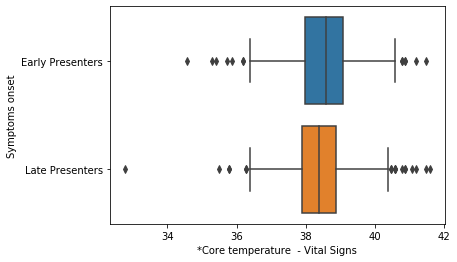

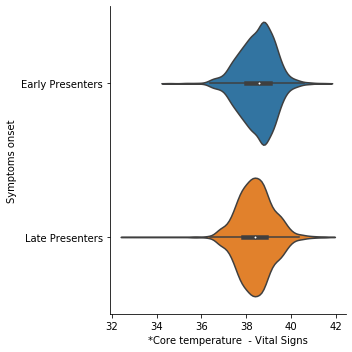

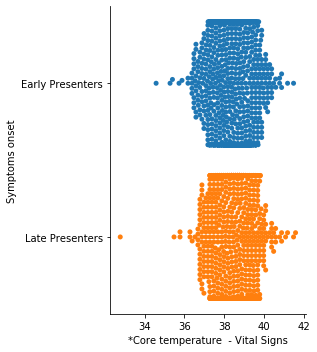

In [210]:
print("====================================================")
print(vitalParamName)
print("====================================================")
print(dfAlt['UNITFROM_DATETIME'].iloc[0])
print("====================================================")
sns.boxplot(data=dfAlt, y='Symptoms onset',x="VALUE")
plt.xlabel(f"{vitalParamName}  - Vital Signs")
sns.catplot(y='Symptoms onset',x="VALUE",  kind = "violin", split = True,data=dfAlt)
plt.xlabel(f"{vitalParamName}  - Vital Signs")
sns.catplot(y='Symptoms onset',x="VALUE", aspect=.9,kind="swarm", data=dfAlt)
plt.xlabel(f"{vitalParamName}  - Vital Signs")

In [211]:
sns.distplot(dfAlt, x="VALUE", hue='Symptoms onset', element="step")
plt.show()



TypeError: distplot() got an unexpected keyword argument 'x'

In [ ]:
plt.show()

#### Loop - Boxplots Live Signs

In [ ]:
timeStampStr = datetime.today().strftime("%y-%m-%d_%H-%M-%S.%f")
# vitalParamName
vitalParamsLst = ['*Heart rate']
print("====================================================")
for vitalParamName in vitalParamsLst:
    mapLabR = dfVitalSWoHospitalUnknown['PARAMETER']== vitalParamName
    dfAlt = dfVitalSWoHospitalUnknown[mapLabR]
    #%%
    print("====================================================")
    print(vitalParamName)
    print("====================================================")
    print(dfAlt['UNITFROM_DATETIME'].iloc[0])
    print("====================================================")
    sns.boxplot(data=dfAlt, y='Symptoms onset',x="VALUE")
    plt.xlabel(f"{vitalParamName}  - Vital Signs")
    sns.catplot(y='Symptoms onset',x="VALUE",  kind = "violin", split = True,data=dfAlt)
    plt.xlabel(f"{vitalParamName}  - Vital Signs")
    sns.catplot(y='Symptoms onset',x="VALUE", aspect=.9,kind="swarm", data=dfAlt)
    plt.xlabel(f"{vitalParamName}  - Vital Signs")
    sns.distplot(dfAlt, x="VALUE", hue='Symptoms onset', element="step")
plt.show()

In [ ]:
# dfLabAllSelNoUnknownHospitals = dfLabAllSel.drop(dfLabAllSel[(dfLabAllSel['Symptoms onset']=="Unknown") |
#                                                        (dfLabAllSel['Symptoms onset']== "Hospital Equired") ].index)

#### Loop - Boxplots Live Signs

